#### Add Root Directory and Ignore warning

In [1]:
import os
os.chdir('..')
import warnings
warnings.filterwarnings('ignore')


# Credit Risk Analysis

### What is the concepts of credit risk 

#### What is Credit Risk Analysis

Credit Risk Analysis is the process of evaluating the likelihood that a borrower will default on their debt obligations. It involves assessing the potential risk that a lender faces when lending money or extending credit to an individual, business, or organization. The goal is to understand how likely the borrower is to repay the loan, as well as the potential impact on the lender if the borrower fails to meet the repayment terms.

# Exploratory Data Analysis (EDA)

#### Import Necessary Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Overview of the Data

To understand the structure of the dataset, including the number of rows, columns, and data types

#### Data Loading

In [3]:
data=pd.read_csv('docs/data.csv')


#### Check Loaded Dataset

In [4]:
data.head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

### Summary Statistics

To understand the central tendency, dispersion, and shape of the dataset’s distribution.

In [6]:
data.describe()


,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


### Distribution of Numerical Features

### Distribution of Categorical Features

### Correlation Analysis

To Understanding the relationship between numerical features.


### Identifying Missing Values

Identify missing values to determine missing data and decide on appropriate imputation strategies.

In [7]:
def find_missing_values(df):
    """
    Finds missing values and returns a summary.

    Args:
        df: The DataFrame to check for missing values.

    Returns:
        A summary of missing values, including the number of missing values per column.
    """

    null_counts = df.isnull().sum()
    missing_value = null_counts
    percent_of_missing_value = 100 * null_counts / len(df)
    data_type = df.dtypes

    missing_data_summary = pd.concat([missing_value, percent_of_missing_value, data_type], axis=1)
    missing_data_summary_table = missing_data_summary.rename(columns={0: "Missing values", 1: "Percent of Total Values", 2: "DataType"})
    missing_data_summary_table = missing_data_summary_table[missing_data_summary_table.iloc[:, 1] != 0].sort_values('Percent of Total Values', ascending=False).round(1)

    print(f"From {df.shape[1]} columns selected, there are {missing_data_summary_table.shape[0]} columns with missing values.")

    return missing_data_summary_table


The Datasets have no missing values

In [11]:
find_missing_values(data)


From 16 columns selected, there are 0 columns with missing values.


,Missing values,Percent of Total Values,DataType


### Outlier Detection

Using box plots to identify outliers.

From Numerical Columns Amount and Value have Outliers

In [13]:
def boxPlotForDetectOutliers(train_data,column_names):
    for column in column_names:
        sns.boxplot(data=train_data[column])
        plt.title(f"Box Plot of {column}")
        plt.show()


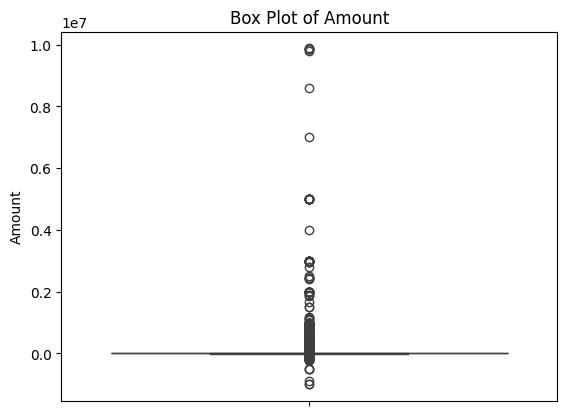

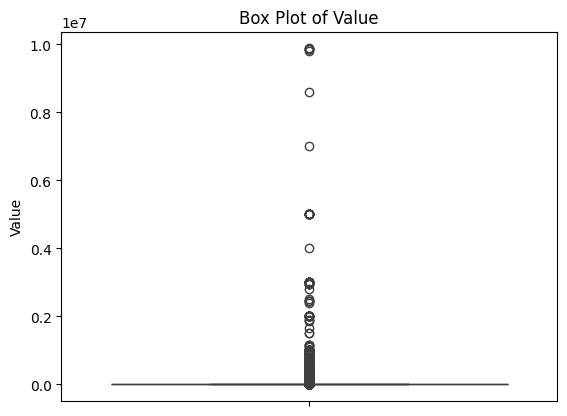

In [24]:
boxPlotForDetectOutliers(data,['Amount','Value'])
